In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# import plotly as py
%matplotlib inline

In [2]:
myCSV = pd.read_csv("scrap price.csv")
sns.set_palette("GnBu_d")
sns.set_style("whitegrid")

In [3]:
myCSV

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


DATA CLEANING--

First, let's take a look at our data and remove any possible duplicate entries. 

In [4]:
myCSV.drop_duplicates(inplace=True)

In [5]:
myCSV.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Now let's see if we can change the "doornumber" column in myCSV to a numeric number instead of a string. 

In [6]:
myCSV["doornumbers"].unique()

array(['two', 'four'], dtype=object)

In [7]:
def doorNumber(testString):
    if testString == "two":
        return 2
    elif testString == "four":
        return 4
    
myCSV.insert(5,"doorNumbers", myCSV["doornumbers"].apply(doorNumber))

In [8]:
myCSV.drop("doornumbers",axis = 1,inplace=True)

Let's do the same to the "cylindernumber" column.

In [9]:
myCSV["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [10]:
def cylinderNumber(testString):
    if testString == "two":
        return 2
    
    if testString == "three":
        return 3
    
    if testString == "four":
        return 4
    
    if testString == "five":
        return 5
    
    if testString == "six":
        return 6
    
    if testString == "eight":
        return 8
    
    elif testString == "twelve":
        return 12
    
myCSV.insert(14,"cylinderNumber", myCSV["cylindernumber"].apply(cylinderNumber))

In [11]:
myCSV.drop("cylindernumber",axis = 1,inplace=True)

In [12]:
myCSV["cylinderNumber"].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

Using dummies, we're going to now change the "fueltypes" column (a category column) into numeric column(s).

In [13]:
myCSV_fueltypes = pd.get_dummies(myCSV["fueltypes"])
myCSV = pd.concat([myCSV, myCSV_fueltypes], axis=1)

In [14]:
myCSV.drop("fueltypes",axis = 1,inplace=True)

Now let's do the same for the "aspiration" column.

In [15]:
myCSV_aspiration = pd.get_dummies(myCSV["aspiration"])
myCSV = pd.concat([myCSV, myCSV_aspiration], axis=1)

In [16]:
myCSV.drop("aspiration",axis = 1,inplace=True)

In [17]:
myCSV

,ID,symboling,name,doorNumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,gas,std,turbo
0,1,3,alfa-romero giulia,2,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111,5000,21,27,13495.0,0,1,1,0
1,2,3,alfa-romero stelvio,2,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111,5000,21,27,16500.0,0,1,1,0
2,3,1,alfa-romero Quadrifoglio,2,hatchback,rwd,front,94.5,171.2,65.5,...,9.0,154,5000,19,26,16500.0,0,1,1,0
3,4,2,audi 100 ls,4,sedan,fwd,front,99.8,176.6,66.2,...,10.0,102,5500,24,30,13950.0,0,1,1,0
4,5,2,audi 100ls,4,sedan,4wd,front,99.4,176.6,66.4,...,8.0,115,5500,18,22,17450.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),4,sedan,rwd,front,109.1,188.8,68.9,...,9.5,114,5400,23,28,16845.0,0,1,1,0
201,202,-1,volvo 144ea,4,sedan,rwd,front,109.1,188.8,68.8,...,8.7,160,5300,19,25,19045.0,0,1,0,1
202,203,-1,volvo 244dl,4,sedan,rwd,front,109.1,188.8,68.9,...,8.8,134,5500,18,23,21485.0,0,1,1,0
203,204,-1,volvo 246,4,sedan,rwd,front,109.1,188.8,68.9,...,23.0,106,4800,26,27,22470.0,1,0,0,1


In [18]:
myCSV.columns

Index(['ID', 'symboling', 'name', 'doorNumbers', 'carbody', 'drivewheels',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylinderNumber', 'enginetype', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'diesel', 'gas', 'std',
       'turbo'],
      dtype='object')

Next, let's remove the "ID" and "symboling" columns as those columns have no use here. For better readabilty, let's also move the "price" column to the front of the DataFrame.

In [19]:
myCSV.drop("ID", axis = 1,inplace=True)
myCSV.drop("symboling", axis = 1,inplace=True)

In [20]:
first_column = myCSV.pop("price")
myCSV.insert(1,"price",first_column)

In [21]:
myCSV

,name,price,doorNumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,diesel,gas,std,turbo
0,alfa-romero giulia,13495.0,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,0,1,1,0
1,alfa-romero stelvio,16500.0,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,0,1,1,0
2,alfa-romero Quadrifoglio,16500.0,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,0,1,1,0
3,audi 100 ls,13950.0,4,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,30,0,1,1,0
4,audi 100ls,17450.0,4,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,22,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),16845.0,4,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.15,9.5,114,5400,23,28,0,1,1,0
201,volvo 144ea,19045.0,4,sedan,rwd,front,109.1,188.8,68.8,55.5,...,3.15,8.7,160,5300,19,25,0,1,0,1
202,volvo 244dl,21485.0,4,sedan,rwd,front,109.1,188.8,68.9,55.5,...,2.87,8.8,134,5500,18,23,0,1,1,0
203,volvo 246,22470.0,4,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.40,23.0,106,4800,26,27,1,0,0,1


Now let's remove the obvious outlier data.

In [22]:

# Q1 = myCSV.quantile(0.05)
# Q3 = myCSV.quantile(0.95)
# QR = Q3 - Q1
# myCSV = myCSV[~((myCSV < (Q1 - 1.5 * IQR)) |(myCSV > (Q3 + 1.5 * IQR))).any(axis=1)]
# myCSV


Checking up on the "name" column, it seems we have A LOT of unique values. Let's clean this up by only having the brand be the vehicle name

In [23]:
print(myCSV["name"].unique(), "\n\n NUMBER OF UNIQUE VEHICLE NAMES: ", myCSV["name"].nunique())

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

In [24]:
myCSV.insert(0,"vehicleBrand",myCSV["name"].apply(lambda name : name.split()[0]))
myCSV.drop("name",axis = 1,inplace=True)

In [25]:
myCSV["vehicleBrand"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [26]:
print("MAX VALUES FROM THE DATAFRAME...\n\n",myCSV.max())

MAX VALUES FROM THE DATAFRAME...

 vehicleBrand             vw
price               45400.0
doorNumbers               4
carbody               wagon
drivewheels             rwd
enginelocation         rear
wheelbase             120.9
carlength             208.1
carwidth               72.3
carheight              59.8
curbweight             4066
cylinderNumber           12
enginetype            rotor
enginesize              326
fuelsystem             spfi
boreratio              3.94
stroke                 4.17
compressionratio       23.0
horsepower              288
peakrpm                6600
citympg                  49
highwaympg               54
diesel                    1
gas                       1
std                       1
turbo                     1
dtype: object


In [27]:
print("MIN VALUES FROM THE DATAFRAME...\n\n",myCSV.min())

MIN VALUES FROM THE DATAFRAME...

 vehicleBrand             Nissan
price                    5118.0
doorNumbers                   2
carbody             convertible
drivewheels                 4wd
enginelocation            front
wheelbase                  86.6
carlength                 141.1
carwidth                   60.3
carheight                  47.8
curbweight                 1488
cylinderNumber                2
enginetype                 dohc
enginesize                   61
fuelsystem                 1bbl
boreratio                  2.54
stroke                     2.07
compressionratio            7.0
horsepower                   48
peakrpm                    4150
citympg                      13
highwaympg                   16
diesel                        0
gas                           0
std                           0
turbo                         0
dtype: object


Now let's begin plotting some general information.

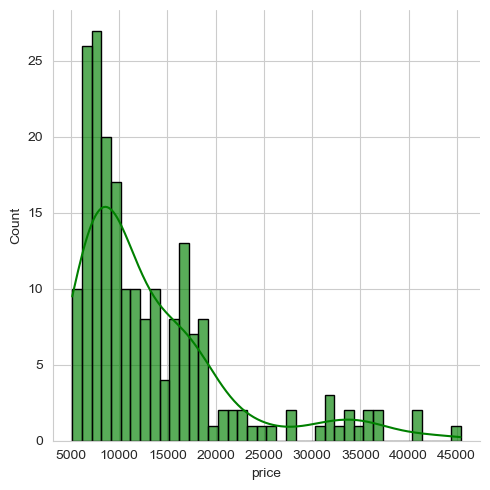

In [28]:
sns.displot(data = myCSV, x = "price", color='g', bins=40, kde=True, linewidth = 1, edgecolor = "black", alpha = 0.65)

C:\Users\Dylan\AppData\Local\Temp\ipykernel_8380\342275883.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  myCSVCorr = myCSV.corr()


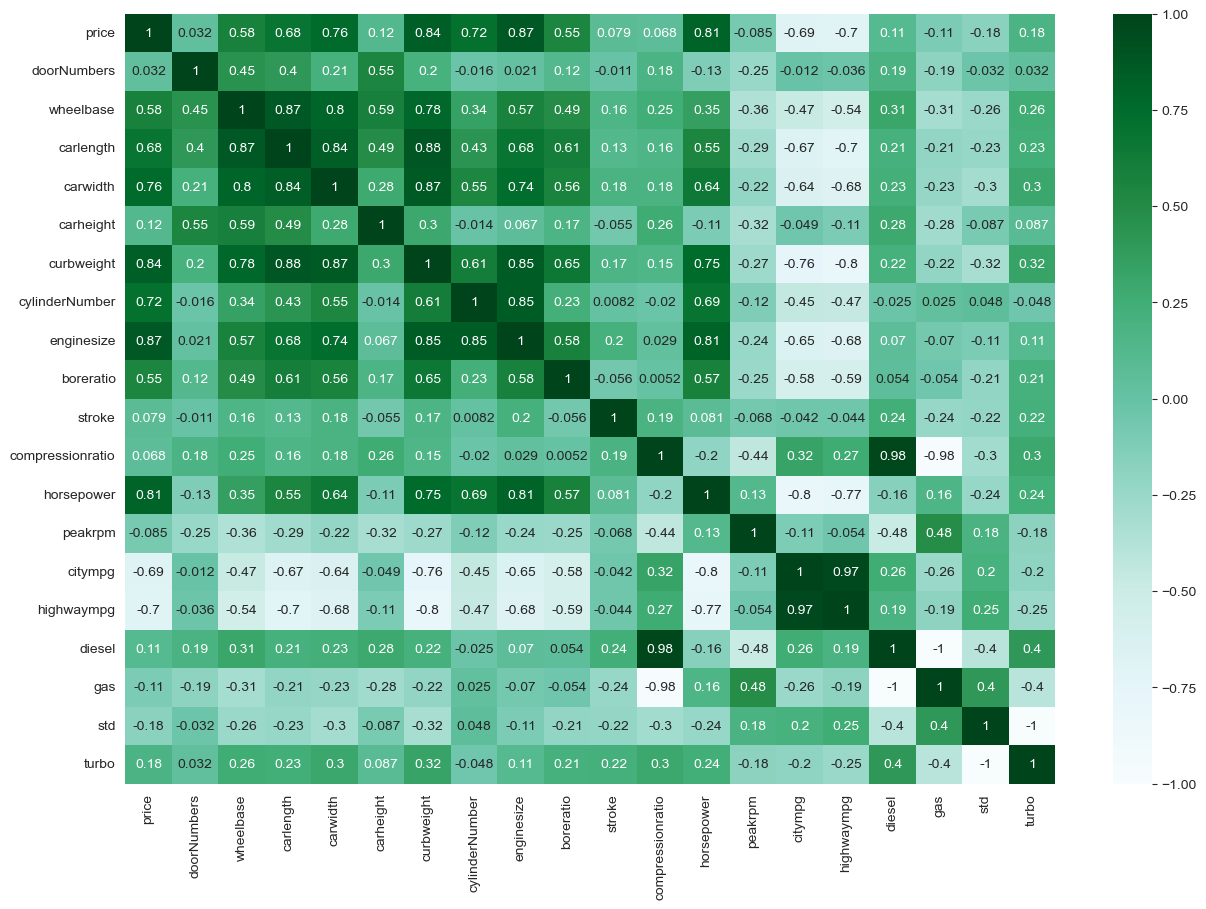

In [29]:
myCSVCorr = myCSV.corr()
plt.figure(figsize=[15,10])
sns.heatmap(data = myCSVCorr,annot=True,cmap="BuGn")
plt.show()

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [30]:
myCSV.columns

Index(['vehicleBrand', 'price', 'doorNumbers', 'carbody', 'drivewheels',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylinderNumber', 'enginetype', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'diesel', 'gas', 'std', 'turbo'],
      dtype='object')

In [31]:
myCSV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vehicleBrand      205 non-null    object 
 1   price             205 non-null    float64
 2   doorNumbers       205 non-null    int64  
 3   carbody           205 non-null    object 
 4   drivewheels       205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  cylinderNumber    205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [32]:
X = myCSV[["doorNumbers","diesel","gas","std","turbo",
       "wheelbase", "carlength",
       "carwidth", "carheight", "curbweight", "cylinderNumber",
       "enginesize", "boreratio", "stroke", "compressionratio",
       "horsepower", "peakrpm", "citympg", "highwaympg"]]

In [33]:
y = myCSV["price"]

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

Now it's time to train the model using our training data using LinearRegression


In [35]:
from sklearn.linear_model import LinearRegression
myLinearRegressionModel = LinearRegression()
myLinearRegressionModel.fit(X_train, y_train)

LinearRegression()

Now let's check out the coefficients of the model...

In [36]:
print("The coefficients of the model are: \n", myLinearRegressionModel.coef_, "\n")

The coefficients of the model are: 
 [-2.98889484e+01  2.20081554e+04 -2.20081554e+04  2.49478980e+03
 -2.49478980e+03 -1.13341788e+02 -4.49578415e+01  5.75807396e+02
  2.14338069e+02  2.13148874e+00 -1.70051299e+03  1.57905400e+02
 -1.29075895e+03 -4.91505928e+03 -2.76723994e+03  7.91131928e+01
  4.76998550e+00  2.29714005e+02 -1.83394334e+01] 



Now we obtain your models prediction results using X_test

In [37]:
myLinearRegressionModelPrediction = myLinearRegressionModel.predict(X_test)

Now we can compare the models prediction to the actual correct values (y_test)

Text(0, 0.5, 'Prediction')

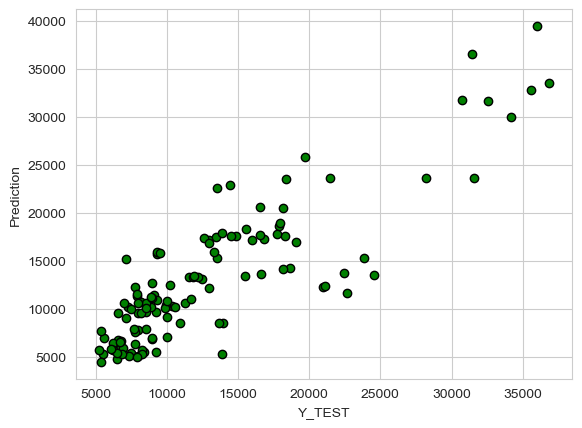

In [38]:
plt.scatter(y_test, myLinearRegressionModelPrediction, color = "g",edgecolor ="black")
plt.xlabel("Y_TEST")
plt.ylabel("Prediction")

<Axes: xlabel='price', ylabel='Count'>

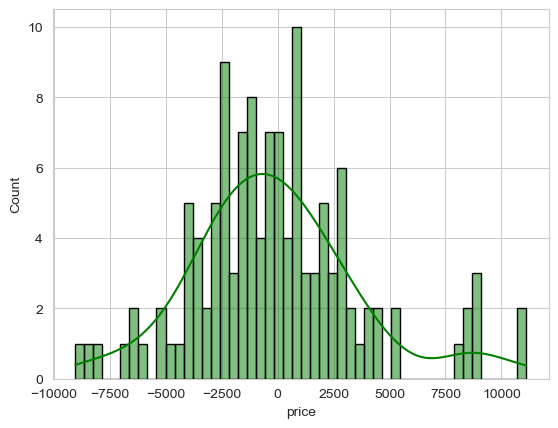

In [39]:
sns.histplot(y_test - myLinearRegressionModelPrediction,color = "g", bins = 50, kde=True,linewidth = 1,edgecolor = "black",alpha = 0.5)

In [40]:
from sklearn import metrics
import math

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, myLinearRegressionModelPrediction))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, myLinearRegressionModelPrediction))
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_squared_error(y_test, myLinearRegressionModelPrediction)))

Mean Absolute Error:  2802.8253205644382
Mean Squared Error:  14018097.089846548
Root Mean Squared Error:  3744.0749311207096


In [618]:
userInput = str(input("Do you wish to use the prediction model to predict the price of a vehicle? (Y/N)"))

Do you wish to use the prediction model to predict the price of a vehicle? (Y/N)Y


In [619]:
myCSV[["doorNumbers","diesel","gas","std","turbo",
       "wheelbase", "carlength",
       "carwidth", "carheight", "curbweight", "cylinderNumber",
       "enginesize", "boreratio", "stroke", "compressionratio",
       "horsepower", "peakrpm", "citympg", "highwaympg"]]

,doorNumbers,diesel,gas,std,turbo,wheelbase,carlength,carwidth,carheight,curbweight,cylinderNumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,2,0,1,1,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
1,2,0,1,1,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
2,2,0,1,1,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26
3,4,0,1,1,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30
4,4,0,1,1,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4,0,1,1,0,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28
201,4,0,1,0,1,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25
202,4,0,1,1,0,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23
203,4,1,0,0,1,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27


In [642]:
myCSV["highwaympg"].describe()

count    194.000000
mean      31.164948
std        6.417561
min       19.000000
25%       25.000000
50%       30.500000
75%       36.000000
max       54.000000
Name: highwaympg, dtype: float64

In [648]:
if (userInput[0] == "Y" or userInput[0] == "y"):
    
    print("Excellent! Please following along with the data input process in order to get your predicted song popularity from the model.\n")
    
    userDoorNumbers = int(input("How many DOORS does the vehicle have?"))
    userGasType = str(input("What type of GAS does the vehicle use? (DIESEL OR GAS)"))
    
    if(userGasType.lower() == "diesel"):
        diesel = 1
        gas = 0
    elif (userGasType.lower() == "gas"):
        gas = 0
        diesel = 1
    
    userAspirationType = str(input("What type of ASPIRATION does the vehicle use? (STANDARD OR TURBO)"))
    
    if(userAspirationType.lower() == "standard"):
        std = 1
        turbo = 0
    elif (userAspirationType.lower() == "turbo"):
        std = 0
        turbo = 1
    
    userWheelBase = float(input("What's the DISTANCE between the front and rear wheels? (MIN = 88.00 , MAX = 110.00)"))
    userCarLength = float(input("What's the CARS LENGTH? (MIN = 186.00 , MAX = 190.00)"))
    userCarWidth = float(input("What's the CARS WIDTH? (MIN = 60.00 , MAX = 70.00)"))
    userCarHeight = float(input("What's the CARS HEIGHT? (MIN = 45.00 , MAX = 57.00)"))
    userCarWeight = float(input("What's the CARS WEIGHT? (MIN = 2000.00 , MAX = 4000.00)"))
    userCarCylinder = int(input("How many CYLINDERS does the vehicle have? (MIN = 2 , MAX = 12)"))
    userCarEngineSize = int(input("What is the SIZE of the engine? (MIN = 70 , MAX = 300)"))
    userCarBoreRatio = float(input("What is the BORE RATIO of the vehicle? (MIN = 2.00 , MAX = 4.00)"))
    userCarStroke = float(input("What is the STROKE VALUE of the vehicle? (MIN = 2.00 , MAX = 4.50)"))
    userCarCompressionRatio = float(input("What is the COMPRESSION RATIO of the vehicle? (MIN = 7.00 , MAX = 24.00)"))
    userCarHorsepower = int(input("What is the HORSEPOWER of the vehicle? (MIN = 50 , MAX = 210)"))
    userCarPeakRPM = int(input("What is the PEAK RPM of the vehicle? (MIN = 4000 , MAX = 7000)"))
    userCarMPGCity = int(input("What is the MPG (MILES PER GALLON) in CITIES? (MIN = 12 , MAX = 50)"))
    userCarMPGHighway = int(input("What is the MPG (MILES PER GALLON) on HIGHWAYS (MIN = 15 , MAX = 60 )"))
    
    
    
    LinearRegressionModelPrediction = myLinearRegressionModel.predict([[userDoorNumbers,diesel,gas,std,turbo,userWheelBase,userCarLength,userCarWidth,userCarHeight,userCarWeight,userCarCylinder,userCarEngineSize,userCarBoreRatio,userCarStroke,userCarCompressionRatio,userCarHorsepower,userCarPeakRPM,userCarMPGCity,userCarMPGHighway]])
                                
    print("The predicted PRICE of the vehicle given the characteristics told about it is... ", LinearRegressionModelPrediction )
    
else: 
    print("User typed No")

Excellent! Please following along with the data input process in order to get your predicted song popularity from the model.

How many DOORS does the vehicle have?4
What type of GAS does the vehicle use? (DIESEL OR GAS)GAS
What type of ASPIRATION does the vehicle use? (STANDARD OR TURBO)STANDARD
What's the DISTANCE between the front and rear wheels? (MIN = 88.00 , MAX = 110.00)89.00
What's the CARS LENGTH? (MIN = 186.00 , MAX = 190.00)187.00
What's the CARS WIDTH? (MIN = 60.00 , MAX = 70.00)61.00
What's the CARS HEIGHT? (MIN = 45.00 , MAX = 57.00)47.00
What's the CARS WEIGHT? (MIN = 2000.00 , MAX = 4000.00)3000.00
How many CYLINDERS does the vehicle have? (MIN = 2 , MAX = 12)4
What is the SIZE of the engine? (MIN = 70 , MAX = 300)100
What is the BORE RATIO of the vehicle? (MIN = 2.00 , MAX = 4.00)3.00
What is the STROKE VALUE of the vehicle? (MIN = 2.00 , MAX = 4.50)3.00
What is the COMPRESSION RATIO of the vehicle? (MIN = 7.00 , MAX = 24.00)10.00
What is the HORSEPOWER of the vehicle?

C:\Users\Dylan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [650]:
myCSV["price"].describe()

count      194.000000
mean     12585.021479
std       6939.047309
min       5118.000000
25%       7775.000000
50%       9988.500000
75%      16322.000000
max      41315.000000
Name: price, dtype: float64